In [152]:
import pandas as pd

In [153]:
df = pd.read_csv("Dataset/house_cleaned.csv")

In [154]:
df.head()
df['additionalRoom'].value_counts()
# df.head(1)

additionalRoom
not available                                    386
servant room                                      81
pooja room,study room,servant room,store room     60
others                                            58
pooja room                                        38
pooja room,study room,servant room                33
pooja room,study room,servant room,others         32
store room                                        31
pooja room,servant room                           24
study room                                        19
study room,servant room                           19
servant room,store room                           15
pooja room,study room                             11
pooja room,others                                 11
pooja room,store room                             11
servant room,others                                8
pooja room,store room,study room,servant room      8
servant room,pooja room                            8
pooja room,servant room,store r

In [155]:
df.columns

Index(['property_name', 'property_type', 'society', 'price', 'price_per_sqft',
       'area', 'areaWithType', 'bedRoom', 'bathroom', 'balcony',
       'additionalRoom', 'address', 'floorNum', 'facing', 'agePossession',
       'nearbyLocations', 'description', 'furnishDetails', 'features',
       'rating'],
      dtype='object')

In [156]:
cols_to_use = ["area", 'price', 'bedRoom', 'bathroom', 'additionalRoom', 'balcony', 'floorNum', 'facing', 'agePossession']
def get_extra_room_num(value):
    arr = value.split(",")
    return len(arr)

In [157]:
df["additionalRoom"] = df["additionalRoom"].apply(get_extra_room_num)


In [158]:
df['facing'] = df['facing'].fillna('Unknown')


In [159]:
def map_age_possession(value):
    if "0 to 1" in value:
        return "New"
    elif "1 to 5" in value:
        return "Mid"
    elif "5 to 10" in value:
        return "Old"
    elif "10+" in value:
        return "Very Old"
    else:
        return "Under Construction"  # includes undefined, future dates, etc.


In [160]:
df["agePossession"] = df["agePossession"].apply(map_age_possession)


In [161]:
house = df[cols_to_use]
house.head()

,area,price,bedRoom,bathroom,additionalRoom,balcony,floorNum,facing,agePossession
0,2610.0,5.25,5,4,1,3+,3.0,North-East,New
1,539.0,5.70,5,4,3,2,2.0,Unknown,Old
2,549.0,2.10,10,10,1,3+,5.0,West,New
3,1161.0,5.00,21,21,1,3+,5.0,North,Mid
4,558.0,3.00,12,12,1,3+,5.0,West,Under Construction


In [162]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area            945 non-null    float64
 1   price           945 non-null    float64
 2   bedRoom         964 non-null    int64  
 3   bathroom        964 non-null    int64  
 4   additionalRoom  964 non-null    int64  
 5   balcony         964 non-null    object 
 6   floorNum        945 non-null    float64
 7   facing          964 non-null    object 
 8   agePossession   964 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 67.9+ KB


In [163]:
object_cols = house.select_dtypes(include='object').columns.tolist()
object_cols

['balcony', 'facing', 'agePossession']

In [164]:
for i in object_cols:
    print(house[i].value_counts())

balcony
3+    365
2     220
3     159
0     115
1     105
Name: count, dtype: int64
facing
Unknown       303
East          178
North-East    158
North         109
West           75
North-West     44
South-East     39
South          34
South-West     24
Name: count, dtype: int64
agePossession
Old                   250
Mid                   227
Very Old              216
Under Construction    162
New                   109
Name: count, dtype: int64


In [165]:
numeric_cols = house.select_dtypes(exclude='object').columns.tolist()
numeric_cols

['area', 'price', 'bedRoom', 'bathroom', 'additionalRoom', 'floorNum']

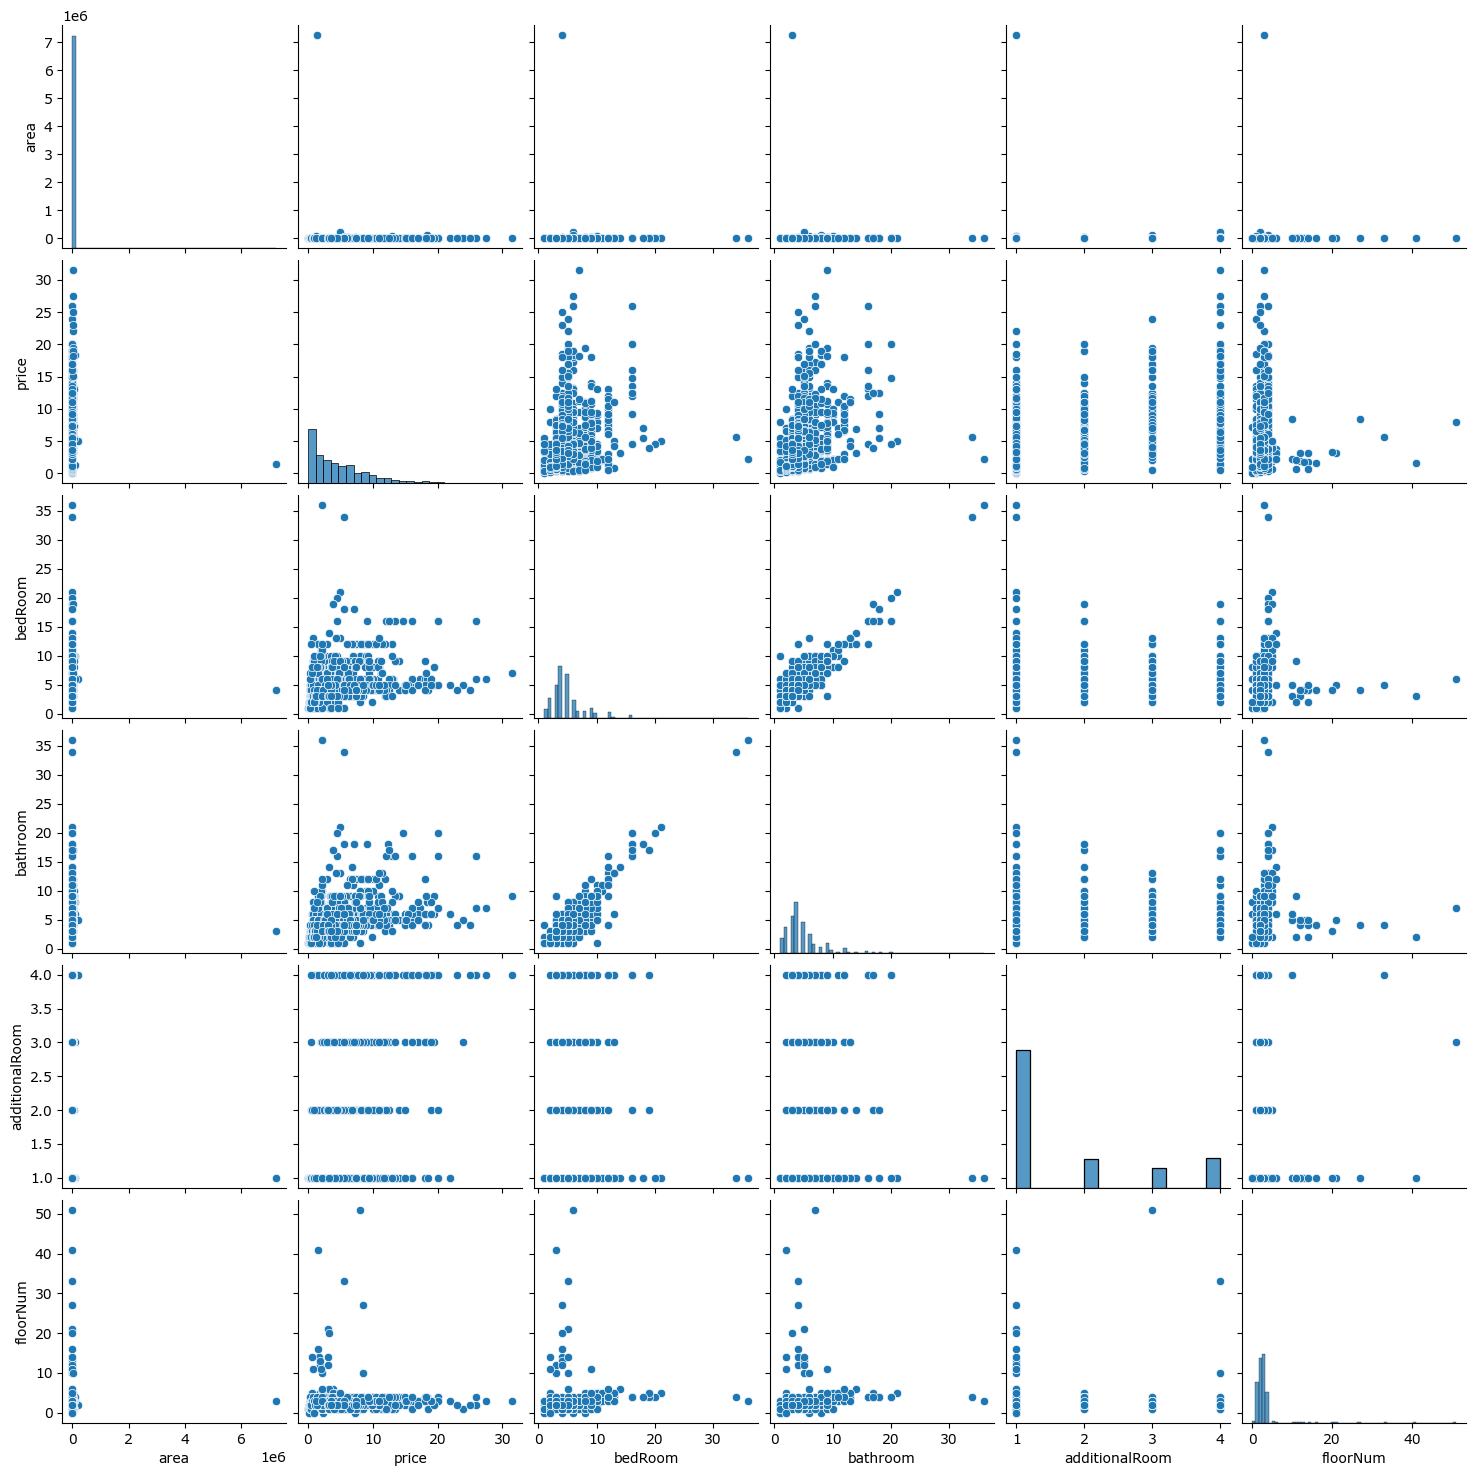

In [166]:
import seaborn as sns
sns.pairplot(house[numeric_cols])

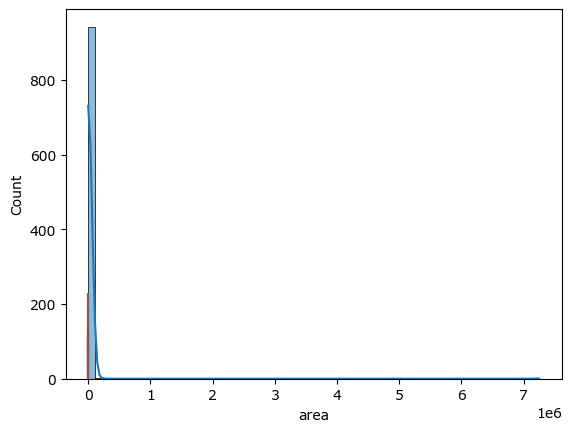

In [167]:
import seaborn as sns
for col in numeric_cols:
    sns.histplot(house[col], kde=True)

In [168]:
from scipy.stats import zscore
z_scores = house[numeric_cols].apply(zscore)
outliers = (abs(z_scores) > 3).sum()
outliers


area               0
price              0
bedRoom           20
bathroom          21
additionalRoom     0
floorNum           0
dtype: int64

In [169]:
print(20/964 * 100)

2.0746887966804977


OUTLIERS -> BEDROOM || 

In [170]:
house.loc[house['bedRoom'] > 6, 'bedRoom'] = 6
house.loc[house['balcony'] == 6, 'balcony'] = "3+"

In [171]:
house['balcony'].value_counts().index
house.loc[house['agePossession'] == 6, 'agePossession'] = "Very Old"

In [172]:
house['agePossession'].value_counts()

agePossession
Old                   250
Mid                   227
Very Old              216
Under Construction    162
New                   109
Name: count, dtype: int64

In [173]:
# house.loc[:, 'balcony'] = house['balcony'].astype(str)

balcony, agePossesion -> ordinalEncoder
facing -> one hot encoder

In [208]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
ohe = OneHotEncoder(drop="first", handle_unknown="ignore")
balcony_order = ["0", "1", "2", "3", "3+"]
age_order = ["New", "Mid", "Old", "Very Old", "Under Construction"]
# oe = OrdinalEncoder(categories=[age_order])
oe = OrdinalEncoder(categories=[balcony_order, age_order])
scaler = StandardScaler()

# oe.fit_transform(house[["agePossession", "balcony"]])


In [209]:
house.head()

,area,price,bedRoom,bathroom,additionalRoom,balcony,floorNum,facing,agePossession
0,2610.0,5.25,5,4,1,3+,3.0,North-East,New
1,539.0,5.70,5,4,3,2,2.0,Unknown,Old
2,549.0,2.10,6,10,1,3+,5.0,West,New
3,1161.0,5.00,6,21,1,3+,5.0,North,Mid
4,558.0,3.00,6,12,1,3+,5.0,West,Under Construction


In [210]:
house.loc[house['facing'] == 6, 'facing'] = "Unknown"

In [211]:
house.isnull().sum()
house = house.dropna()

In [212]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical = ColumnTransformer(transformers=[
    ("balcony&age", oe, [4, 7]),
    ("facing", ohe, [6]),
    ("scale", scaler, [0])
], remainder="passthrough")


In [213]:
from sklearn.model_selection import train_test_split
X = house.drop(columns=['price'], axis=1)
Y = house['price']
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=2, train_size=0.25)

In [214]:
Y.shape

(926,)

In [215]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

pipeline = Pipeline(steps=[
    ("encoders", categorical),
    ('model', lr)
])

In [216]:
pipeline.fit(X_train, y_train)

,steps,"[('encoders', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('balcony&age', ...), ('facing', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [217]:
from sklearn.metrics import r2_score
preds = pipeline.predict(X_test)
r2_score(y_test, preds)

0.29454931700857

In [218]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
# from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Define models
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "SGDRegressor": SGDRegressor(max_iter=1000, tol=1e-3),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=100, random_state=42),
}

# Evaluate each model
for name, model in models.items():
    pipeline.steps[-1] = ('model', model)  # Swap final estimator
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: R² Score = {r2:.4f}")

LinearRegression: R² Score = 0.2945
Ridge: R² Score = 0.3026
Lasso: R² Score = 0.3419
ElasticNet: R² Score = 0.3392
SGDRegressor: R² Score = 0.3319
RandomForest: R² Score = 0.6038
AdaBoost: R² Score = 0.4817


In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=2, train_size=0.25)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
pipeline = Pipeline(steps=[
    ("encoders", categorical),
    ('model', rf)
])

pipeline.fit(X_train, y_train)
from sklearn.metrics import r2_score
preds = pipeline.predict(X_test)
r2_score(y_test, preds)

0.603763069080169

In [237]:
import pickle

# Save the pipeline to a file
with open("house_price_pipeline.pkl", "wb") as f:
    pickle.dump(pipeline, f)
